## Analizing life expectancy and GDP

The goal of this project is to get a better understanding of life expectancy and if and how it is correlated with GDP.

Data provided by: [Codecademy](https://www.codecademy.com) 

*Data Scientist: Machine Learning course, Data Visualization Portfolio Project module.*

`all_data.csv`

### Project scope

#### Goals

Gaining insight on the provided data. As the title says we will look at data containing life expectancy and GDP ad main features, probably more infomation.

#### Analysis

The main focus is exploring the provided data (EDA) with necessary vizualisation in order to finally evaluate it.

0. Importing necessary libraries

As a start we load numpy, pandas, matplotlib and seaborn for analysis and vizualisation.

In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

1. Loading the data

First look what we got here, loading the data into a pandas DataFrame, look at the first few lines and get some information about the data.

In [112]:
raw_data = pd.read_csv("all_data.csv")
raw_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [113]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


2. Analysing the data

First we ask some questions what do we want to know? Which questions can be answered with the provided data.

- How did GDP developed through the years?
- How did life expectancy developed?
- Can we detect any correlation between GDP and life expectancy?

Defining a function to make GDP more human readable.

In [114]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you're dealing with Quadrillions!
    return '{:.2f}{}'.format(num, ['', 'K', 'M', 'B', 'T'][magnitude])

In [140]:
le_mean = raw_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
sorted_df = le_mean.sort_values(by='Life expectancy at birth (years)', ascending=False)
sorted_df['GDP'] = sorted_df['GDP'].apply(human_format)
sorted_df

,Country,Life expectancy at birth (years),GDP
2,Germany,79.65625,3.09T
0,Chile,78.94375,169.79B
4,United States of America,78.06250,14.07T
3,Mexico,75.71875,976.65B
1,China,74.26250,4.96T
5,Zimbabwe,50.09375,9.06B


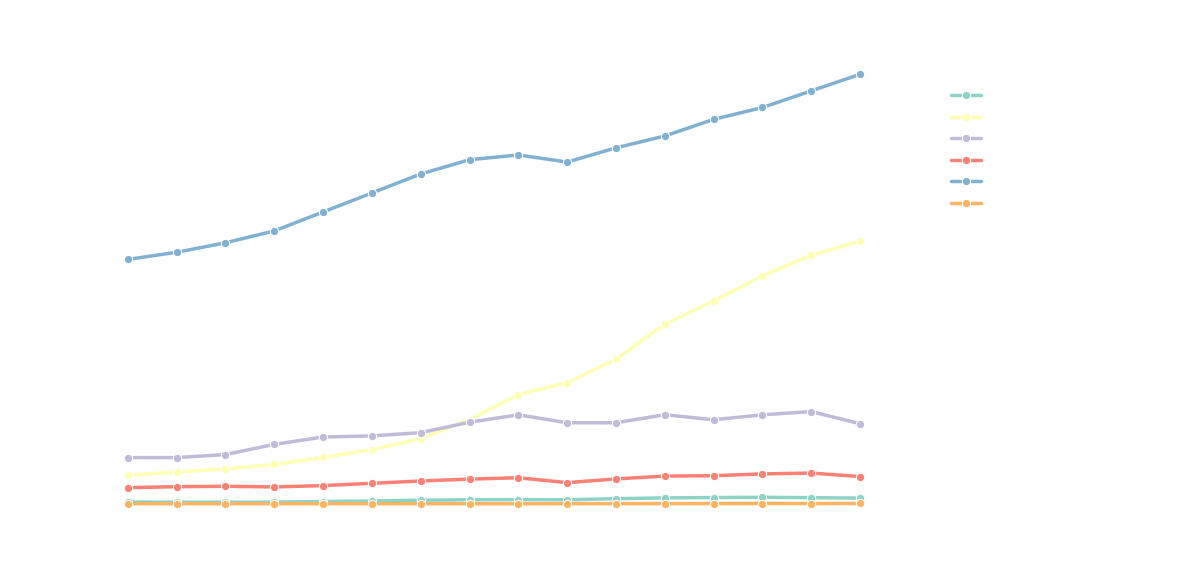

<Figure size 640x480 with 0 Axes>

In [127]:
import matplotlib.ticker as ticker

sns.set_theme(style="whitegrid", palette="bright")
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))

line_plot = sns.lineplot(
    data=raw_data, 
    x='Year', 
    y='GDP', 
    hue='Country', 
    linewidth=2.5,
    marker='o'
)

plt.title('GDP Over Time', fontsize=16, color='white', pad=20)
plt.ylabel('GDP', color='white')
plt.xlabel('Year', color='white')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: human_format(x)))

plt.tight_layout()
plt.show()
plt.clf()

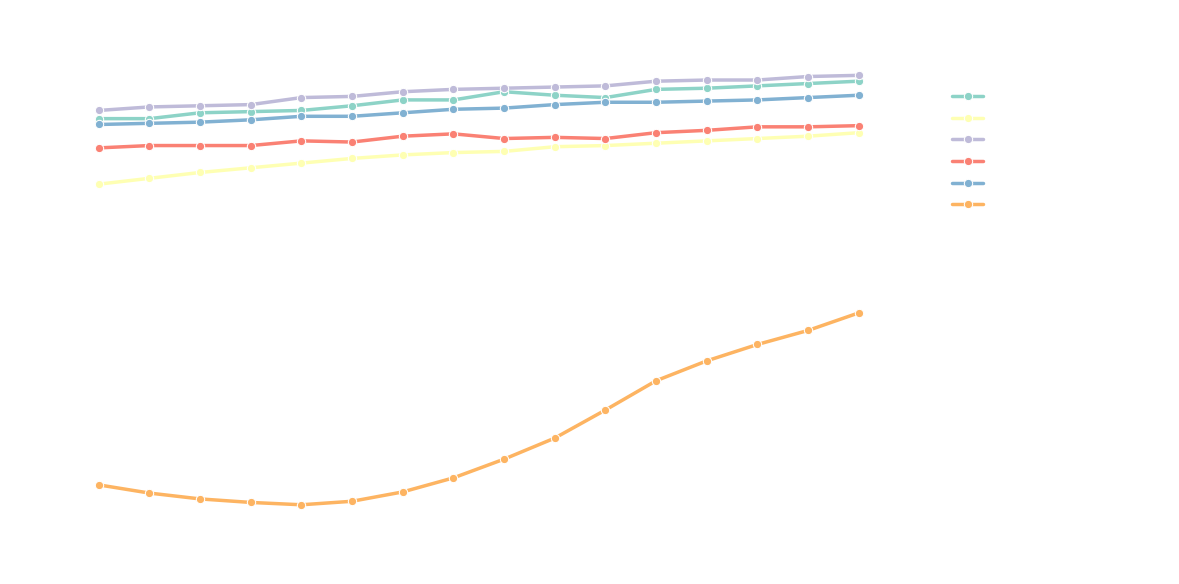

<Figure size 640x480 with 0 Axes>

In [116]:
fig, ax = plt.subplots(figsize=(12, 6))

line_plot = sns.lineplot(
    data=raw_data, 
    x='Year', 
    y='Life expectancy at birth (years)', 
    hue='Country', 
    linewidth=2.5,
    marker='o'
)

plt.title('Life Expectancy Over Time', fontsize=16, color='white', pad=20)
plt.ylabel('Life Expectancy (Years)', color='white')
plt.xlabel('Year', color='white')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()
plt.clf()

1. The Correlation Plot (GDP vs. Life Expectancy)

Does more money actually equal a longer life? A scatter plot can show if the relationship is linear or if there’s a "point of diminishing returns."

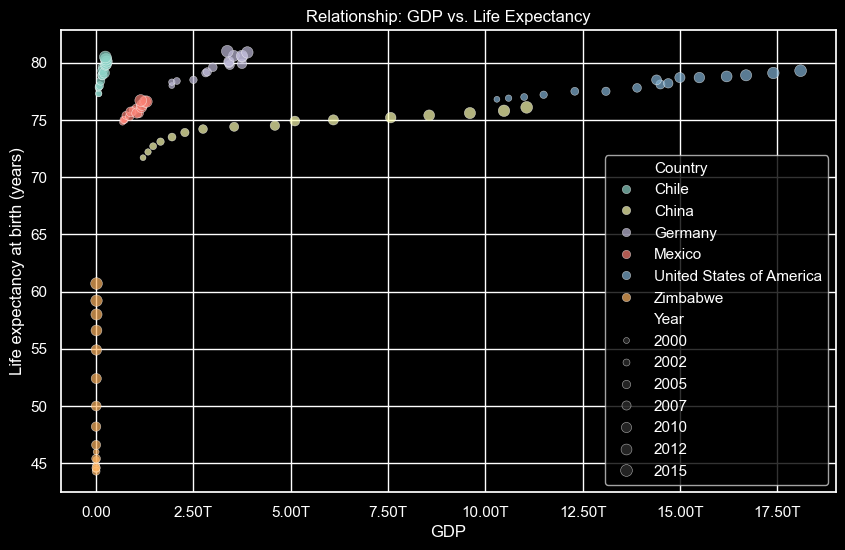

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=raw_data, 
    x='GDP', 
    y='Life expectancy at birth (years)', 
    hue='Country', 
    size='Year',
    alpha=0.7
)
plt.title('Relationship: GDP vs. Life Expectancy')
# Apply your human_format function to the x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: human_format(x)))

plt.show()
plt.clf()

In [ ]:
# Calculate the annual increase in life expectancy
raw_data['Life_Exp_Change'] = raw_data.groupby('Country')['Life expectancy at birth (years)'].diff()

# Find which country had the single biggest "leap" in a single year
biggest_leap = raw_data.nlargest(1, 'Life_Exp_Change')
print(biggest_leap)

     Country  Year  Life expectancy at birth (years)           GDP  \
91  Zimbabwe  2011                              54.9  1.209845e+10   

    Life_Exp_Change  
91              2.5  


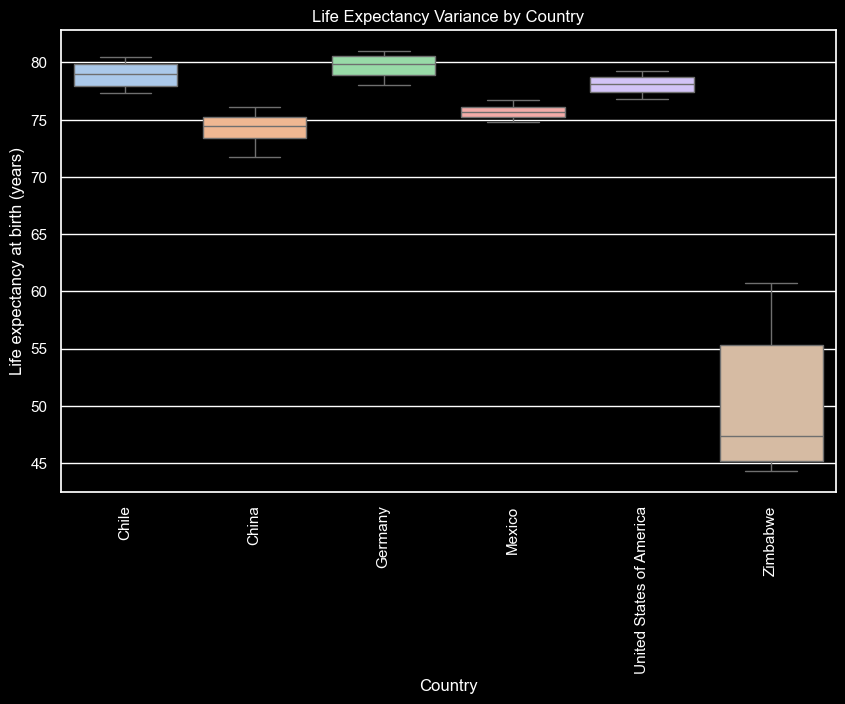

<Figure size 640x480 with 0 Axes>

In [123]:
sns.set_theme(style="whitegrid", palette="bright")
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=raw_data, 
    x='Country', 
    y='Life expectancy at birth (years)', 
    palette='pastel',
    hue='Country'
)
plt.xticks(rotation=90)
plt.title('Life Expectancy Variance by Country')
plt.show()
plt.clf()

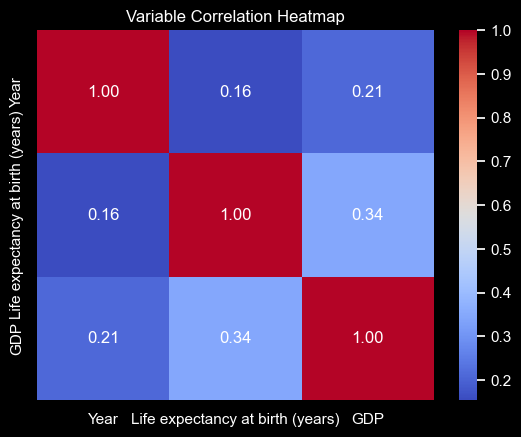

In [124]:
# Select only numeric columns
numeric_df = raw_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variable Correlation Heatmap')
plt.show()